### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import operator

%matplotlib inline

## Performing EDA on Dataset

##### Reading the excel file using pandas

In [2]:
data=pd.read_excel('C:\\Users\\rajka\\Downloads\\zomato_train.xlsx')
# using head function print 5 rows
data.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [3]:
data.shape

(41373, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

Dropping columns 'url', 'address', 'phone' and 'menu_item' as they are not much relevant for analysis or empty.

In [5]:
data.drop(['url', 'address', 'phone', 'menu_item'], axis=1, inplace=True)

In [6]:
data.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rates
0,Al Swaad Take Away,Yes,No,13,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...",Delivery,Residency Road,3.1
1,The Boozy Griffin,No,Yes,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",Dine-out,Koramangala 6th Block,4.6
2,Barkat,No,No,6,BTM,Quick Bites,NaN,Kerala,250,[],Dine-out,Koramangala 4th Block,3.4
3,Sriracha,No,No,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",Dine-out,Residency Road,4.3
4,Sri Ganesh Juice Junction,Yes,No,129,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...",Delivery,Koramangala 6th Block,3.7


In [7]:
def plot_location_graph(data, title):
    '''
    Function to plot barplot between locations and restaurants
    based on provided filtered data   
    '''
    loc_count = data    # frequency data for locations
    plt.figure(figsize=(20,10))
    sns.barplot(loc_count.index, loc_count.values, alpha=0.8, color = 'skyblue')
    plt.title(title, fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

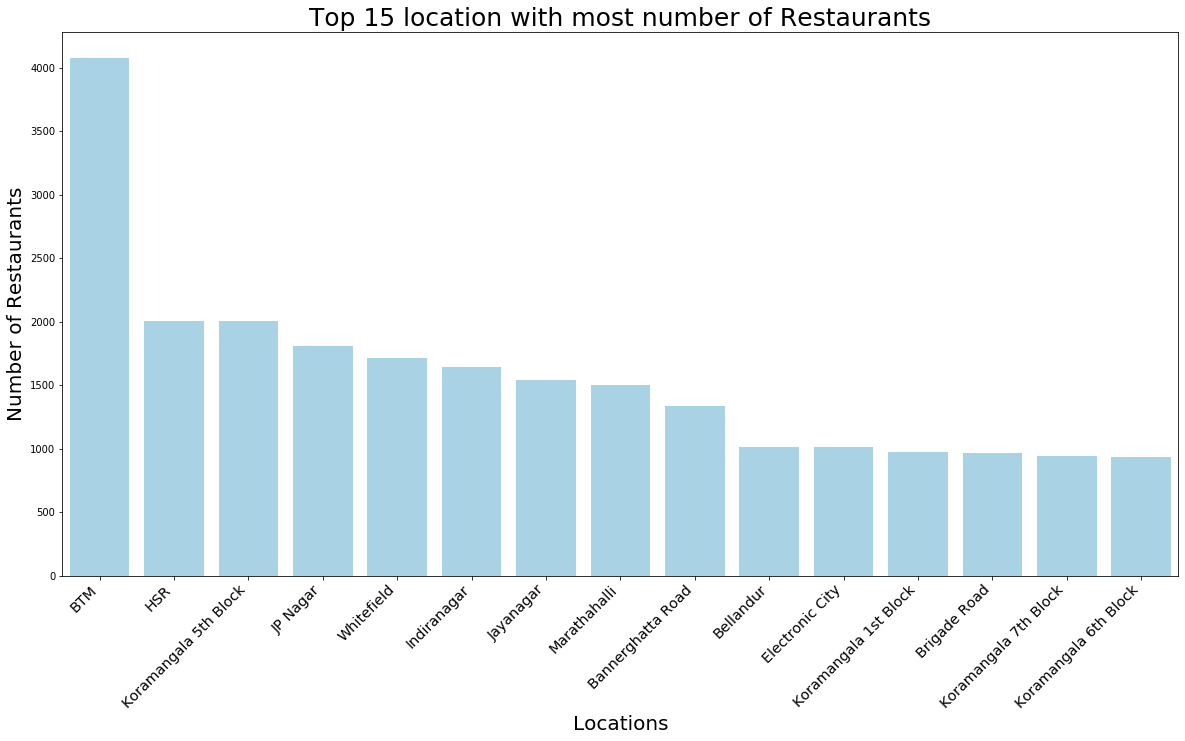

In [8]:
# Filtering top 15 locations with maximum number of restaurants in it

plot_location_graph(data['location'].value_counts()[:15,], 'Top 15 location with most number of Restaurants')

We can see from above barplot that BTM, HSR and Koramangala are top locations with maximum number of restaurants. 
We can infer below points.

1.)The competition amomg these locations can be tough to break                                                                
2.)Most of the foodie are in this area or prefer to go to these locations.

In [9]:
print('There are total {} unique Restaurants in Bangalore'.format(len(data['name'].unique())))

There are total 8487 unique Restaurants in Bangalore


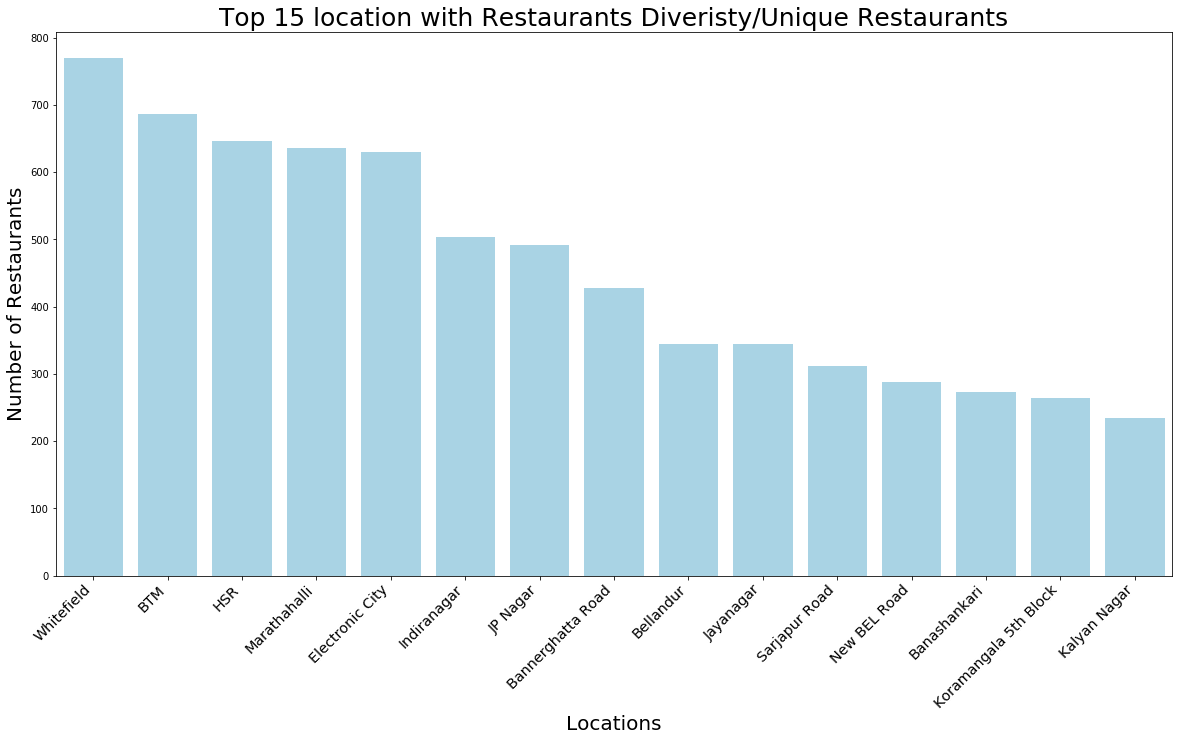

In [10]:
# Filtering locations with most number of unique restaurants

plot_location_graph(data.groupby('location')['name'].nunique().sort_values(ascending=False)[:15,], 'Top 15 location with Restaurants Diveristy/Unique Restaurants')

If you are trying to open a new foodchain then locations with most number of unique restaurants can be helpful.                
It looks like people prefer to open new restaurants in these locations before moving to locations like Kormangala.

Whitefield tops the chart and it maked sense also. It's a newly established locality filled with working professionals.        
As it's little bit far away from central bangalore, you might not need to pay hefty amount to start a business.

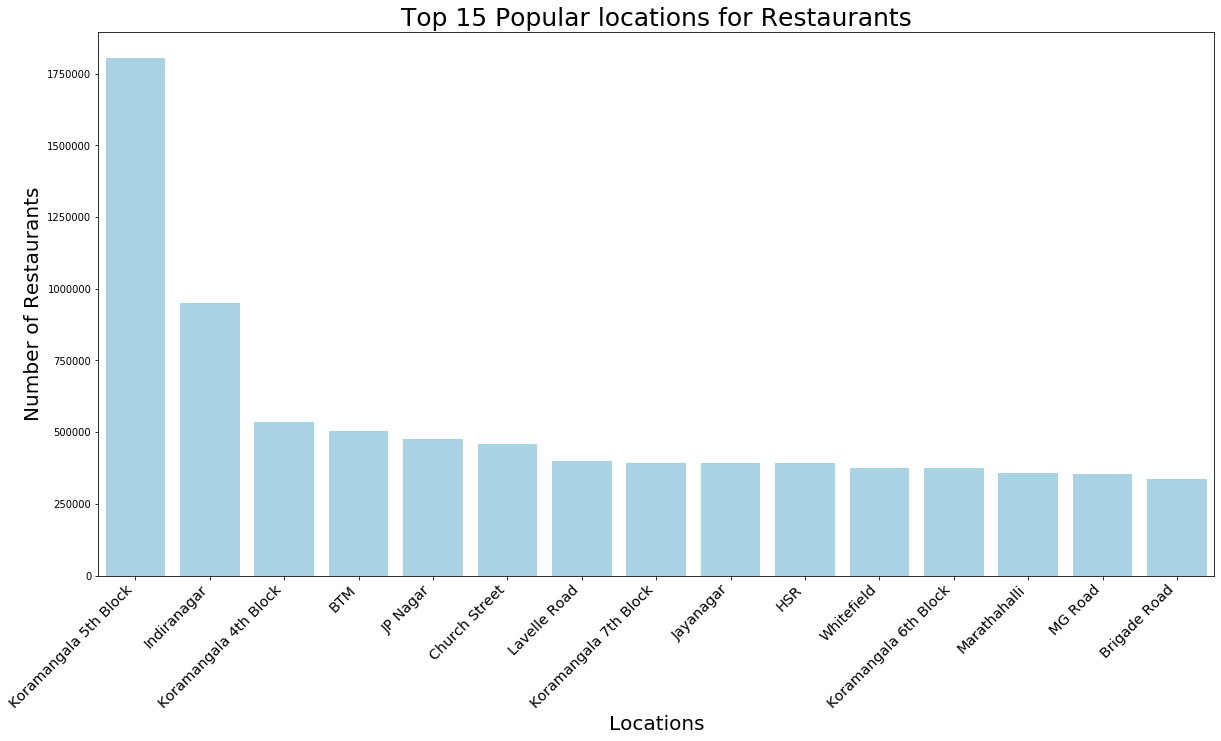

In [11]:
# Filtering locations based on number of votes given by customers

plot_location_graph(data.groupby('location')['votes'].sum().sort_values(ascending=False)[:15,], 
                    'Top 15 Popular locations for Restaurants')

In [12]:
def dish_liked_counter(data):
    
    dish_liked_dict = {}
    dishes = data['dish_liked'].dropna()

    for dish in dishes:
        dish_list = [x.strip() for x in dish.split(',')]
        for dish_item in dish_list:
            if dish_item in dish_liked_dict.keys():
                dish_liked_dict[dish_item] +=1
            else:
                dish_liked_dict[dish_item] = 1
    return dish_liked_dict

In [13]:
def plot_top_dishes(dish_liked_dict):
    sorted_dish = sorted(dish_liked_dict.items(), key=operator.itemgetter(1), reverse=True)
    x = [x[0] for x in sorted_dish[:20]]
    y = [y[1] for y in sorted_dish[:20]]
    
    plt.figure(figsize=(20,10))
    sns.barplot(x, y, alpha=0.8, color = 'skyblue')
    plt.title('Top 20 most liked dishes', fontsize=25)
    plt.ylabel('Number of Restaurants', fontsize=20)
    plt.xlabel('Locations', fontsize=20)
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.show()

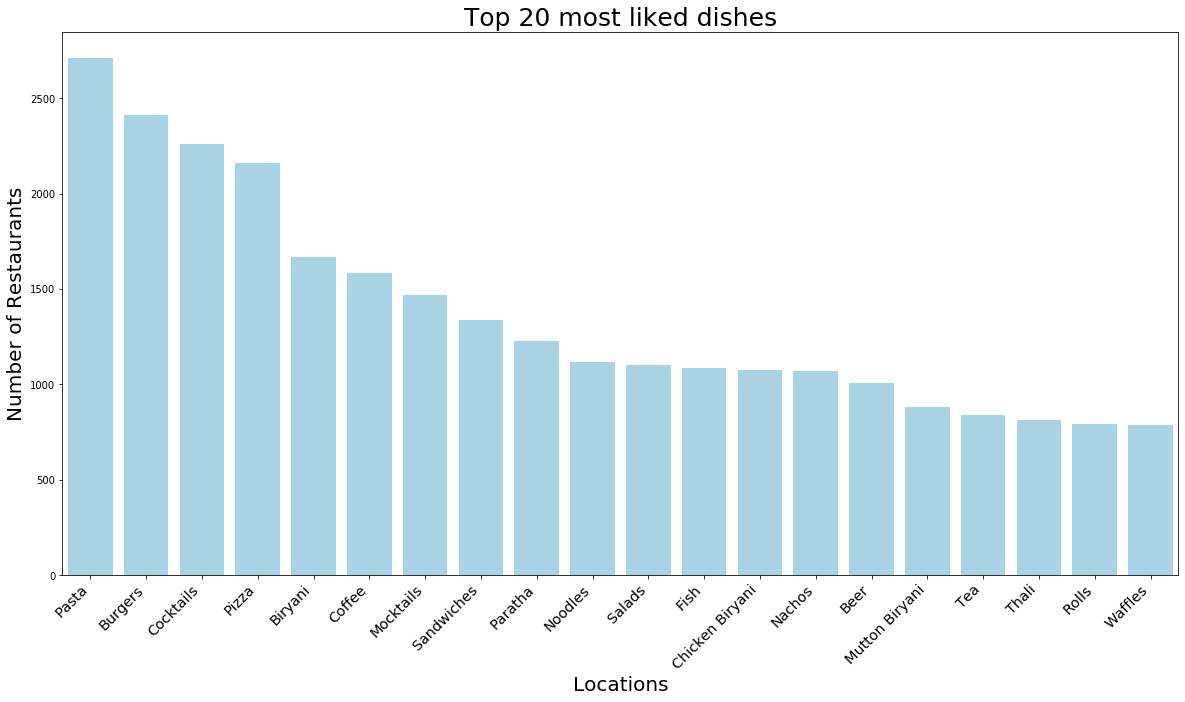

In [14]:
dish_liked_dict = dish_liked_counter(data)
plot_top_dishes(dish_liked_dict)

With such a large number of youth crowd in Bangalore, it comes with no surprise that fast foods i.e. Pasta, Burgers, Cocktails
and Pizza top the chart of most liked dish. Fast Food or a Cafe is a win here.

In [15]:
def online_order_pie(data):
    #Function to plot online order pie chart   

    online_order = data['online_order'].value_counts()
    plt.pie(online_order.values, labels=online_order.index, autopct='%1.1f%%', explode=(0, 0.1) ,shadow=True)
    plt.title('Is online order available ?')
    plt.axis('equal')
    plt.show()

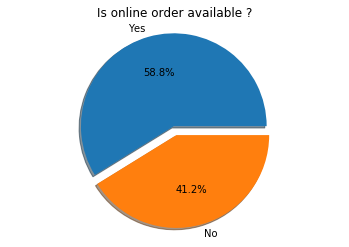

In [16]:
online_order_pie(data)

## Preparing the data for the ML model

Check the following data columns for null values. if there is any null values in the column then we delete that rows so that    
it wouldn't create problems while making model

In [17]:
data = data[pd.notnull(data['cuisines'])]
data = data[pd.notnull(data['dish_liked'])]
data = data[pd.notnull(data['rest_type'])]
data = data[pd.notnull(data['location'])]
data = data[pd.notnull(data['rates'])]
data = data[pd.notnull(data['approx_cost(for two people)'])]


If there is any space present in rates column then we replace it

In [18]:
data['rates'] = data['rates'].str.replace(' ', '')

# check that there is not 'NEW' and '-' marked inside the 'rates' columns of dataset

data = data[data['rates'] != 'NEW']
data = data[data['rates'] != '-']

 if there is any ',' present in                                                                                                 
 'approx_cost(for two people)' ,                                                                                               
 'cuisines' ,                                                                                                                  
 'dish_liked' ,           
 'rest_type' ,                                                                                                                 
 'location' sections                                                                                                           
 then we replace it with ''

In [19]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(',', '')
data['cuisines'] = data['cuisines'].str.replace(',', '')
data['dish_liked'] = data['dish_liked'].str.replace(',', '')
data['rest_type'] = data['rest_type'].str.replace(',', '')
data['location'] = data['location'].str.replace(',', '')

we will replace 'NaN' value present in 'approx_cost(for two people)' with its median value

In [20]:
data['approx_cost(for two people)'].replace(np.NaN, data['approx_cost(for two people)'].median())

1        1800
3        1500
7        2500
8         700
9         600
         ... 
41350     400
41357     500
41359     750
41360     650
41368     700
Name: approx_cost(for two people), Length: 18592, dtype: object

Reseting the index

In [21]:
data.reset_index(inplace = True)

we will drops the columns which is not too affecting the rating

In [22]:
data.columns

Index(['index', 'name', 'online_order', 'book_table', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [23]:
data.drop(['approx_cost(for two people)', 'index','name','online_order','book_table','votes','reviews_list','listed_in(type)','listed_in(city)'], inplace = True,axis=1)
data.shape

(18592, 5)

In [24]:
data.head()

,location,rest_type,dish_liked,cuisines,rates
0,Koramangala 5th Block,Casual Dining Pub,Cocktails Craft Beer Salads Devils Chicken Sea...,European Continental,4.6
1,Lavelle Road,Casual Dining,Noodles Laksa Cocktails Dumplings Sangria Momo...,Thai Chinese Indonesian Asian Momos,4.3
2,Marathahalli,Lounge,Coffee Cocktails Tiramisu Cappuccino Hot Choco...,European French North Indian,3.9
3,Koramangala 7th Block,Cafe,Burgers Coffee Waffles Mocktails Pasta Brownie...,Cafe American Italian Beverages,4.1
4,BTM,Casual Dining,Biryani Raita,Biryani North Indian Chinese,3.6


preparing the 'training' and 'test' sets for model

In [25]:
catagories = data['rates']
catagories = np.unique(catagories)
lables = catagories.tolist()
lables.pop(0)
y= data['rates']
x= data["location"]+ " "+ data["cuisines"]+ " "+ data["dish_liked"]+ " "+ data["rest_type"]

X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

v = TfidfVectorizer()
x_train_tf= v.fit_transform(X_train)
x_test_tf= v.transform(X_test)
y_expect= y_test

(14873,) (14873,)
(3719,) (3719,)


In [26]:
clf_entropy= DecisionTreeClassifier(criterion = 'entropy', random_state=100)
clf_entropy.fit(x_train_tf, y_train)
y_pred_entropy= clf_entropy.predict(x_test_tf)
print('accuracy score : ', accuracy_score(y_expect, y_pred_entropy)*100, '%')


accuracy score :  84.3775208389352 %


In [27]:
y_pred_entropy[0:5]

array(['4.1', '4.3', '3.9', '3.9', '4.4'], dtype=object)